In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pySankey.sankey import sankey
import matplotlib 
import matplotlib
from matplotlib import *

In [136]:
df_mut = pd.read_csv('TEV_Daivd_Liu_Mutation_Sites_Numbering.csv')
df_mut = df_mut.iloc[[0] + list(range(3,8)) + list(range(9,14)), :]
df_mut.columns = df_mut.columns + df_mut.iloc[0,:]
df_mut = df_mut.iloc[1:,:]
df_mut.head()

,PDB numberingAA,T17S,H28L,T30A,N68D,E107D,D127A,F132L,S135F,I138T,...,S170A,N171D,N176T,N177M,R203Q,V209M,W211I,K215E,M218F,K229E
3,E107D_D127A_S135F,NaN,NaN,NaN,NaN,X,X,NaN,X,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E107D_D127A_S135F_R203Q_K215E,NaN,NaN,NaN,NaN,X,X,NaN,X,NaN,...,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN
5,H28L_T30A,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,I138T_N171D_N176T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,L2F,X,X,X,X,X,X,X,X,NaN,...,X,X,X,X,NaN,X,X,NaN,X,X


In [137]:
df_melt = pd.melt(df_mut, id_vars=['PDB numberingAA'], value_vars=df_mut.columns[1:], ignore_index=False).dropna()[['PDB numberingAA','variable']]
df_melt.head()

,PDB numberingAA,variable
7,L2F,T17S
11,T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E,T17S
5,H28L_T30A,H28L
7,L2F,H28L
5,H28L_T30A,T30A


In [138]:
b, c = df_melt.iloc[0], df_melt.iloc[1]
temp = df_melt.iloc[0].copy()
df_melt.iloc[0] = c
df_melt.iloc[1] = temp

b, c = df_melt.iloc[1], df_melt.iloc[9]
temp = df_melt.iloc[1].copy()
df_melt.iloc[1] = c
df_melt.iloc[9] = temp

b, c = df_melt.iloc[2], df_melt.iloc[24]
temp = df_melt.iloc[2].copy()
df_melt.iloc[2] = c
df_melt.iloc[24] = temp

In [146]:
PDBnumbering = ['V209M_W211I_M218F', 'N176I', 'I138T_N171D_N176T', 'E107D_D127A_S135F', 'H28L_T30A', 'L2F', 'T146S_D148P_S153N_S170A_N177M',
 'E107D_D127A_S135F_R203Q_K215E', 'T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E'
 ]

In [35]:
df_mut = pd.read_csv('HCV_Mutation_Sites_Numbering.csv')
df_mut = df_mut.iloc[[0] + list(range(3,6)), :]
df_mut.columns = df_mut.columns + df_mut.iloc[0,:]
df_mut = df_mut.iloc[1:,:]
df_mut.head()

,PDB numberingAA,R170K,A171T,D183A
3,HCV_A171T,NaN,X,NaN
4,HCV_D183A,NaN,NaN,X
5,HCV_Triple,X,X,X


In [20]:
df_melt = pd.melt(df_mut, id_vars=['PDB numberingAA'], value_vars=df_mut.columns[1:], ignore_index=False).dropna()[['PDB numberingAA','variable']]
df_melt

,PDB numberingAA,variable
5,HCV_Triple,R170K
3,HCV_A171T,A171T
5,HCV_Triple,A171T
4,HCV_D183A,D183A
5,HCV_Triple,D183A


In [24]:
b, c = df_melt.iloc[1], df_melt.iloc[3]
temp = df_melt.iloc[1].copy()
df_melt.iloc[1] = c
df_melt.iloc[3] = temp

# Sankey diagram

In [18]:
len(list(set(df_melt['variable'].values)) + list(set(df_melt['PDB numberingAA'])))

32

In [26]:
len(list(set(df_melt['PDB numberingAA'])))

9

In [221]:
palettes = ['tab10', 'Set2', 'Dark2','Set1']
COLORS = []
for p in palettes:
    cmap = cm.get_cmap(p)#SET2_COLORS.keys())
    for i in range(cmap.N):
        rgba = cmap(i)
        COLORS.append(matplotlib.colors.rgb2hex(rgba))

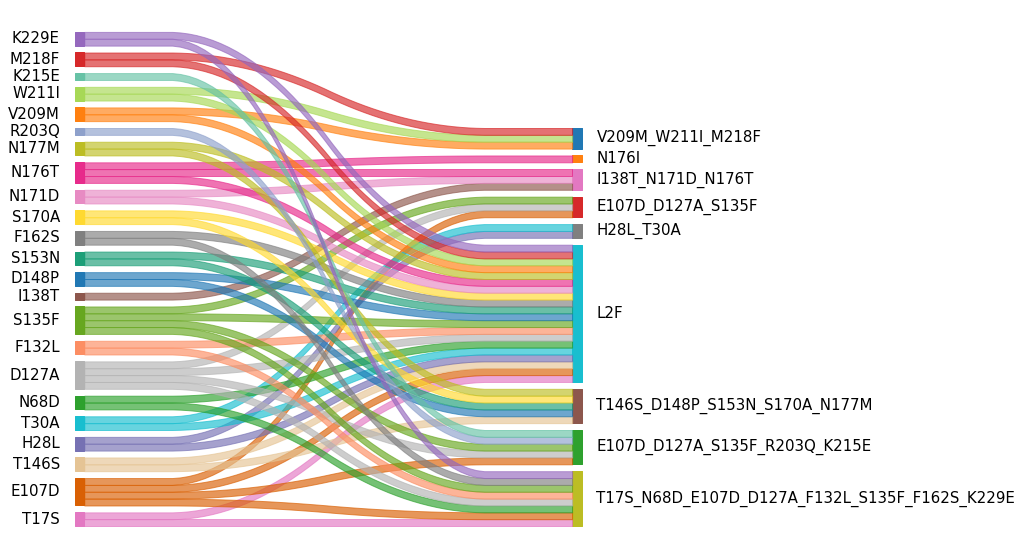

In [145]:
palettes = ['tab10', 'Set2', 'Dark2','Set1']
COLORS = []
for p in palettes:
    cmap = cm.get_cmap(p)#SET2_COLORS.keys())
    for i in range(cmap.N):
        rgba = cmap(i)
        COLORS.append(matplotlib.colors.rgb2hex(rgba))
COLORS = COLORS[0:23]
cmap = cm.get_cmap('tab10', 9)#SET2_COLORS.keys())
for i in range(cmap.N):
    rgba = cmap(i)
    COLORS.append(matplotlib.colors.rgb2hex(rgba))
    
colors = {u:v for u,v in zip(list(set(df_melt['variable'].values)) + list(set(df_melt['PDB numberingAA'])), COLORS)}

plt.rc('font',family='Roboto')
plt.rc('text', usetex=True)
sankey(left=df_melt['variable'], right=df_melt['PDB numberingAA'], colorDict=colors, aspect=20, fontsize=15)
plt.gcf().set_size_inches((10,10))
plt.savefig('figs/sankey.png',dpi=400, bbox_inches = 'tight', format='png')

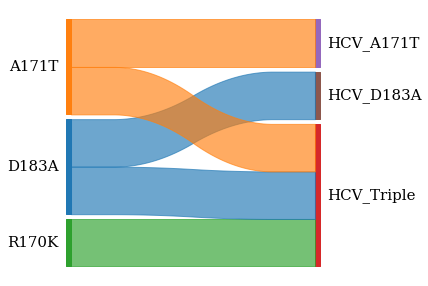

In [54]:
palettes = ['tab10']
COLORS = []
for p in palettes:
    cmap = cm.get_cmap(p)#SET2_COLORS.keys())
    for i in range(cmap.N):
        rgba = cmap(i)
        COLORS.append(matplotlib.colors.rgb2hex(rgba))
# cmap = cm.get_cmap('tab10')#SET2_COLORS.keys())
# for i in range(cmap.N):
#     rgba = cmap(i)
#     COLORS.append(matplotlib.colors.rgb2hex(rgba))
    
colors = {u:v for u,v in zip(list(set(df_melt['variable'].values)) + list(set(df_melt['PDB numberingAA'])), COLORS)}

plt.rc('font',family='Roboto')
plt.rc('text', usetex=True)
sankey(left=df_melt['variable'], right=df_melt['PDB numberingAA'], colorDict=colors, aspect=20, fontsize=15)
plt.gcf().set_size_inches((5,5))
plt.savefig('figs/sankey_hcv.png',dpi=400, bbox_inches = 'tight', format='png')

# Barplot

In [147]:
df_mut['#samples'] = [93, 143, 78, 148, 3139, 374, 287, 419, 226, 518]
df_sample = df_mut.set_index(df_mut.columns[0])
samples_values = df_sample.loc[['WT']+PDBnumbering, ['#samples']]
samples_values = samples_values.iloc[::-1,:]

In [148]:
samples_values.index

Index(['T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E',
       'E107D_D127A_S135F_R203Q_K215E', 'T146S_D148P_S153N_S170A_N177M', 'L2F',
       'H28L_T30A', 'E107D_D127A_S135F', 'I138T_N171D_N176T', 'N176I',
       'V209M_W211I_M218F', 'WT'],
      dtype='object', name='PDB numberingAA')

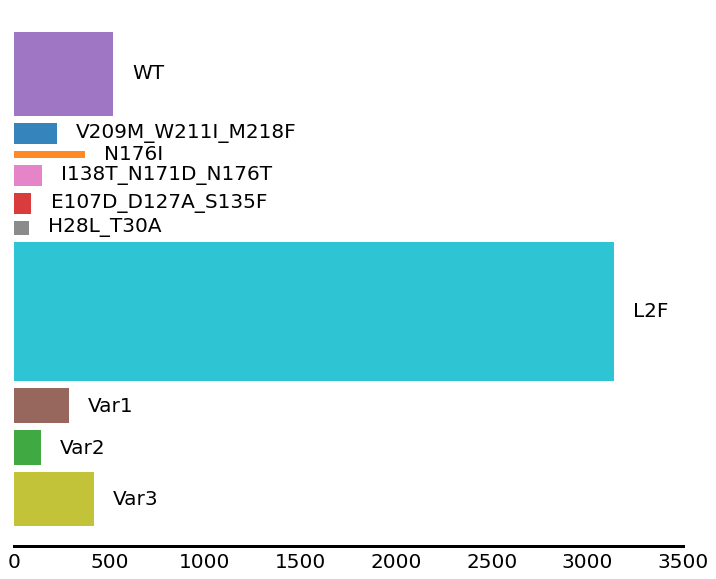

In [260]:
bandWidth = [1.15,0.75,0.75,3,0.3,0.45,0.45,0.15,0.45,1.8]
plt.figure(figsize=(12,10))
r1 = np.arange(samples_values.shape[0])
plt.rc('font',family='Roboto')
plt.rc('text',usetex=False)
plt.rc('font', size=20)
#Var3:T17S_N68D_E107D_D127A_F132L_S135F_F162S_K229E
#Var2: E107D_D127A_S135F_R203Q_K215E
#Var1: T146S_D148P_S153N_S170A_N177M

x_pos = [0]
for i in range(len(bandWidth)-1):
    x_pos.append(bandWidth[i] / 2 + 0.15 + bandWidth[i+1] / 2 + x_pos[i])
plt.barh(x_pos, samples_values['#samples'].values,  height=bandWidth, color=[colors[x] for x in PDBnumbering[::-1]] + ['#9467bd'], alpha=0.9)

# plt.yticks(np.arange(samples_values.shape[0]))
# plt.yticks(np.linspace(0,samples_values.shape[0], 100))
plt.xlim(0,3500)
# plt.yticks(x_pos, ['L2F', 'Var3', 'H28L_T30A',
#        'E107D_D127A_S135F', 'Var2',
#        'I138T_N171D_N176T', 'Var1', 'N176I',
#        'V209M_W211I_M218F','WT'])
plt.yticks([])
# plt.xticks([])
# plt.gca().spines['left'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
# plt.gca().spines.left.set_bounds((-0.575, 10.025))
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_position(('data', -1))
plt.gca().tick_params(width=0)
plt.gca().spines['bottom'].set_linewidth(3)
# plt.gca().spines['left'].set_linewidth(2)
names = ['Var3',
       'Var2', 'Var1', 'L2F',
       'H28L_T30A', 'E107D_D127A_S135F', 'I138T_N171D_N176T', 'N176I',
       'V209M_W211I_M218F', 'WT']
for i,value in zip(r1, samples_values['#samples']):
    plt.text(value+100, x_pos[i], names[i], ha='left', va='center',size=20)
plt.savefig('figs/barplotTEV.png', format='png', dpi=400, bbox_inches='tight')

In [14]:
df_mut = pd.read_csv('HCV_Mutation_Sites_Numbering.csv')
df_mut = df_mut.iloc[[0] + list(range(2,6)), :]
df_mut.columns = df_mut.columns + df_mut.iloc[0,:]
df_mut = df_mut.iloc[1:,:]
df_mut['#samples'] = [7342, 13208, 11864, 6838]
df_sample = df_mut.set_index(df_mut.columns[0])
PDBnumbering = ['HCV_A171T','HCV_D183A','HCV_Triple']
samples_values = df_sample.loc[['HCV_WT'] + PDBnumbering, ['#samples']]
samples_values = samples_values.iloc[::-1,:]

In [25]:
PDBnumbering[::-1]

['HCV_Triple', 'HCV_D183A', 'HCV_A171T']

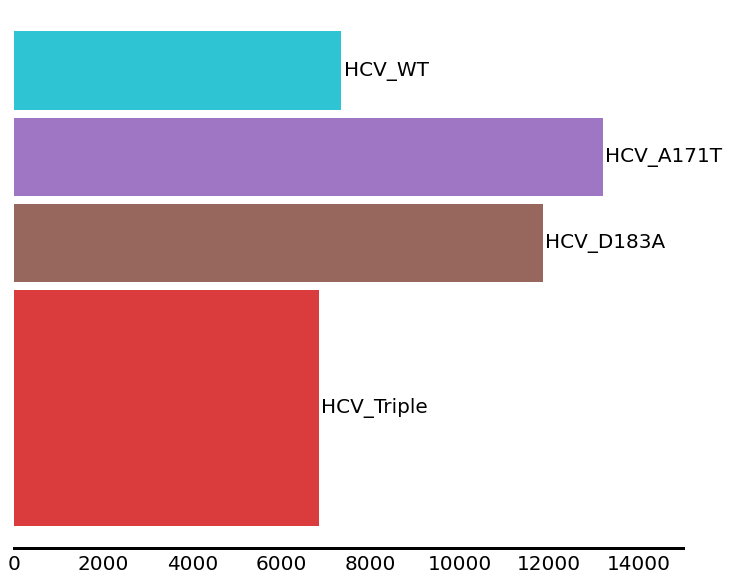

In [29]:
bandWidth = [4.5,1.5, 1.5,1.5]
plt.figure(figsize=(12,10))
r1 = np.arange(samples_values.shape[0])
plt.rc('font',family='Roboto')
plt.rc('text',usetex=False)
plt.rc('font', size=20)
palettes = ['tab10']
colors={'D183A': '#1f77b4',
 'A171T': '#ff7f0e',
 'R170K': '#2ca02c',
 'HCV_Triple': '#d62728',
 'HCV_A171T': '#9467bd',
 'HCV_D183A': '#8c564b'}

x_pos = [0]
for i in range(len(bandWidth)-1):
    x_pos.append(bandWidth[i] / 2 + 0.15 + bandWidth[i+1] / 2 + x_pos[i])
plt.barh(x_pos, samples_values['#samples'].values,  height=bandWidth, color=[colors[x] for x in PDBnumbering[::-1]] + ["#17becf"], alpha=0.9)

# plt.yticks(np.arange(samples_values.shape[0]))
# plt.yticks(np.linspace(0,samples_values.shape[0], 100))
plt.xlim(0,15000)
# plt.yticks(x_pos, ['L2F', 'Var3', 'H28L_T30A',
#        'E107D_D127A_S135F', 'Var2',
#        'I138T_N171D_N176T', 'Var1', 'N176I',
#        'V209M_W211I_M218F','WT'])
plt.yticks([])
# plt.xticks([])
# plt.gca().spines['left'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
# plt.gca().spines.left.set_bounds((-0.575, 10.025))
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_position(('data', -2.675))
plt.gca().tick_params(width=0)
plt.gca().spines['bottom'].set_linewidth(3)
# plt.gca().spines['left'].set_linewidth(2)
names = PDBnumbering[::-1]+['HCV_WT']
for i,value in zip(r1, samples_values['#samples']):
    plt.text(value+50, x_pos[i], names[i], ha='left', va='center',size=20)
plt.savefig('figs/barplotHCV.png', format='png', dpi=400, bbox_inches='tight')